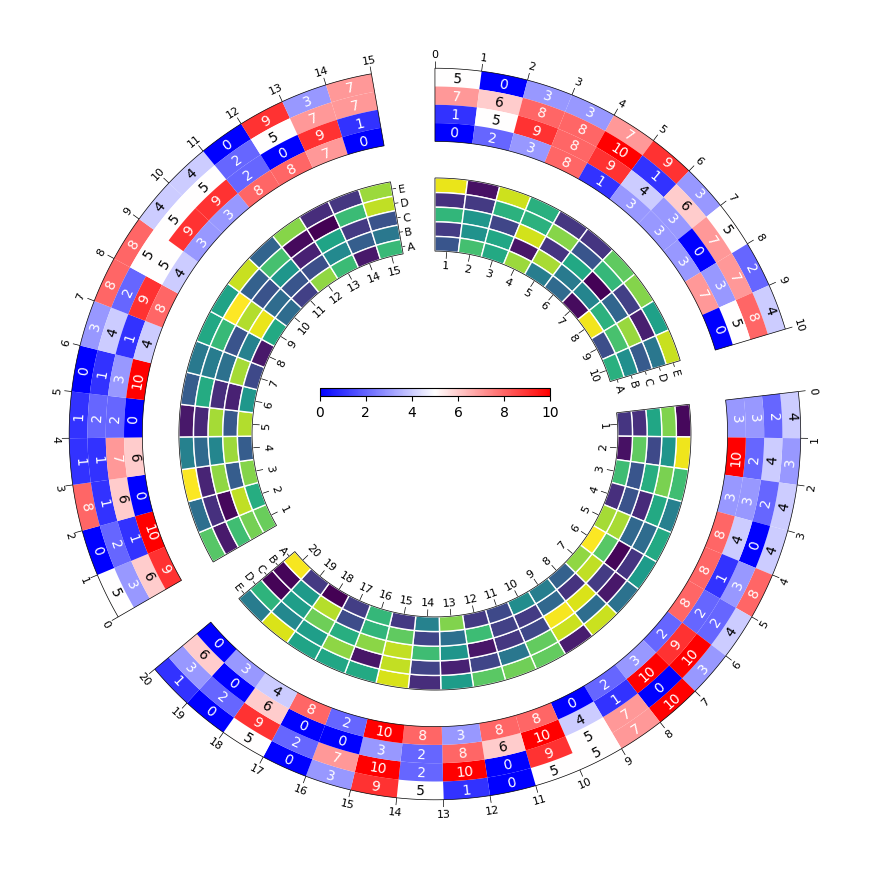

In [ ]:
from pycirclize import Circos
import numpy as np
np.random.seed(0)

sectors = {"A": 10, "B": 20, "C": 15}
circos = Circos(sectors, space=10)
vmin1, vmax1 = 0, 10
vmin2, vmax2 = -100, 100
for sector in circos.sectors:
    # Plot heatmap
    track1 = sector.add_track((80, 100))
    track1.axis()
    track1.xticks_by_interval(1)
    data = np.random.randint(vmin1, vmax1 + 1, (4, int(sector.size)))
    track1.heatmap(data, vmin=vmin1, vmax=vmax1, show_value=True)
    # Plot heatmap with labels
    track2 = sector.add_track((50, 70))
    track2.axis()
    x = np.linspace(1, int(track2.size), int(track2.size)) - 0.5
    xlabels = [str(int(v + 1)) for v in x]
    track2.xticks(x, xlabels, outer=False)
    track2.yticks([0.5, 1.5, 2.5, 3.5, 4.5], list("ABCDE"), vmin=0, vmax=5)
    data = np.random.randint(vmin2, vmax2 + 1, (5, int(sector.size)))
    track2.heatmap(data, vmin=vmin2, vmax=vmax2, cmap="viridis", rect_kws=dict(ec="white", lw=1))

circos.colorbar(bounds=(0.35, 0.55, 0.3, 0.01), vmin=vmin1, vmax=vmax1, orientation="horizontal")
circos.colorbar(bounds=(0.35, 0.45, 0.3, 0.01), vmin=vmin2, vmax=vmax2, orientation="horizontal", cmap="viridis")

fig = circos.plotfig()